In [20]:
import pandas as pd
from sqlalchemy import create_engine

# MySQL credentials
user = 'root'
password = 'password'
host = 'localhost'
database = 'covide19'

# Create SQLAlchemy engine
engine = create_engine(f'mysql+mysqlconnector://{user}:{password}@{host}/{database}')

# CSV 1
csv_file1 = "C:/Users/Asus/datascience covide sql/CovidDeaths.csv"

df1 = pd.read_csv(csv_file1)
df1.to_sql(name='covid_deaths', con=engine, if_exists='replace', index=False)

# CSV 2
csv_file2 = "C:/Users/Asus/datascience covide sql/CovidVaccinations.csv"
df2 = pd.read_csv(
    csv_file2,
    parse_dates=['date'],   # 👈 date column
    low_memory=False)

df2.to_sql(name='covid_vaccinations', con=engine, if_exists='replace', index=False)



print("Both CSV files successfully imported into separate tables!")


Both CSV files successfully imported into separate tables!


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mysql.connector
db = mysql.connector.connect(host='localhost',
    user='root',
    password='password',
    database='covide19')
db.autocommit = True

cur = db.cursor()

In [22]:
query = """ SELECT * FROM covid_deaths; """
cur.execute(query)
data = cur.fetchall()
columns = [desc[0] for desc in cur.description]
df = pd.DataFrame(data, columns = columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85171 entries, 0 to 85170
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               85171 non-null  object 
 1   continent                              81060 non-null  object 
 2   location                               85171 non-null  object 
 3   date                                   85171 non-null  object 
 4   total_cases                            83072 non-null  float64
 5   new_cases                              83070 non-null  float64
 6   new_cases_smoothed                     82069 non-null  float64
 7   total_deaths                           73408 non-null  float64
 8   new_deaths                             73566 non-null  float64
 9   new_deaths_smoothed                    82069 non-null  float64
 10  total_cases_per_million                82623 non-null  float64
 11  ne

In [23]:
query = """ SELECT * FROM covid_deaths; """
cur.execute(query)
data = cur.fetchall()
columns = [desc[0] for desc in cur.description]
df = pd.DataFrame(data,columns = columns)
df.head(7)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


# Top 10 country with the highest infecation rate

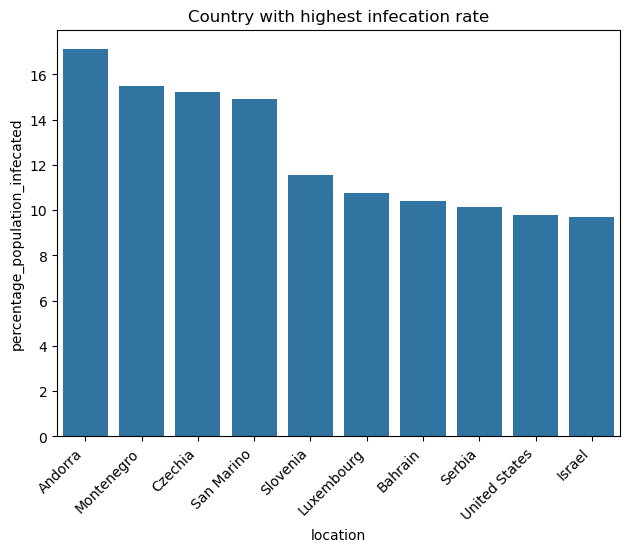

In [24]:
query = """select location, population, max(total_cases) as Total_Infection_as_country,
 max(total_cases/population)*100 as percentage_population_infecated
 from covid_deaths
--  where location ='Nepal'
 group by location, population
 order by percentage_population_infecated desc"""
cur.execute(query)
data = cur.fetchall()
columns = [desc[0] for desc in cur.description]
df = pd.DataFrame(data, columns = columns)
top_10 = df.head(10)
sns.barplot(data = top_10, 
            x = 'location',
            y = 'percentage_population_infecated'
           )
plt.tight_layout()
plt.title("Country with highest infecation rate")
plt.xticks(rotation = 45, ha='right')
plt.show()

# Top 10 country with highest death rate

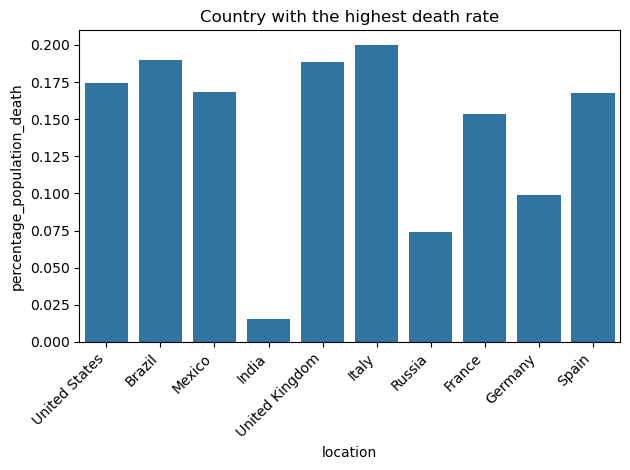

In [25]:
query = ("""select location,  max(total_deaths) as total_death_as_country,
max(total_deaths/population)*100 as percentage_population_death
from covid_deaths
where continent is not null
group by location
order by total_death_as_country desc
limit 10"""
        )
cur.execute(query)
data = cur.fetchall()
columns = [desc[0] for desc in cur.description]
df = pd.DataFrame(data, columns = columns)

sns.barplot(data = df,
            x = 'location',
            y = 'percentage_population_death')
plt.title("Country with the highest death rate")
plt.xticks(rotation = 45, ha ='right')
plt.tight_layout()
plt.show()

# Total cases and total deaths due to covide in global

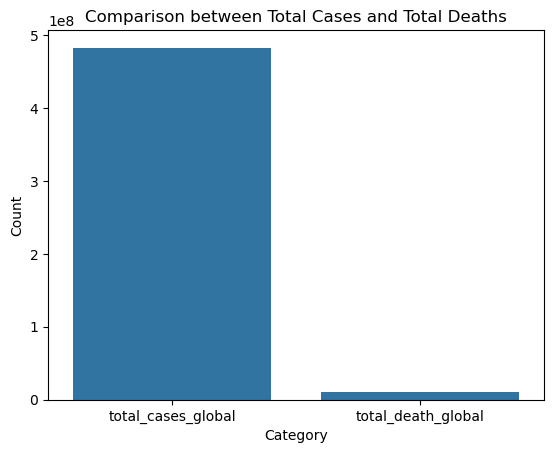

In [26]:
query = ("""select  sum(new_cases) as total_cases_global,
sum(new_deaths) as total_death_global

from covid_deaths

""")
cur.execute(query)
data = cur.fetchall()
columns = [desc[0] for desc in cur.description]
df = pd.DataFrame(data, columns = columns)
df_long = df.melt(var_name='Category', value_name='Count')
sns.barplot(x='Category', y='Count', data=df_long)
plt.title('Comparison between Total Cases and Total Deaths')
plt.ylabel('Count')
plt.show()

# vaccinated people over continent

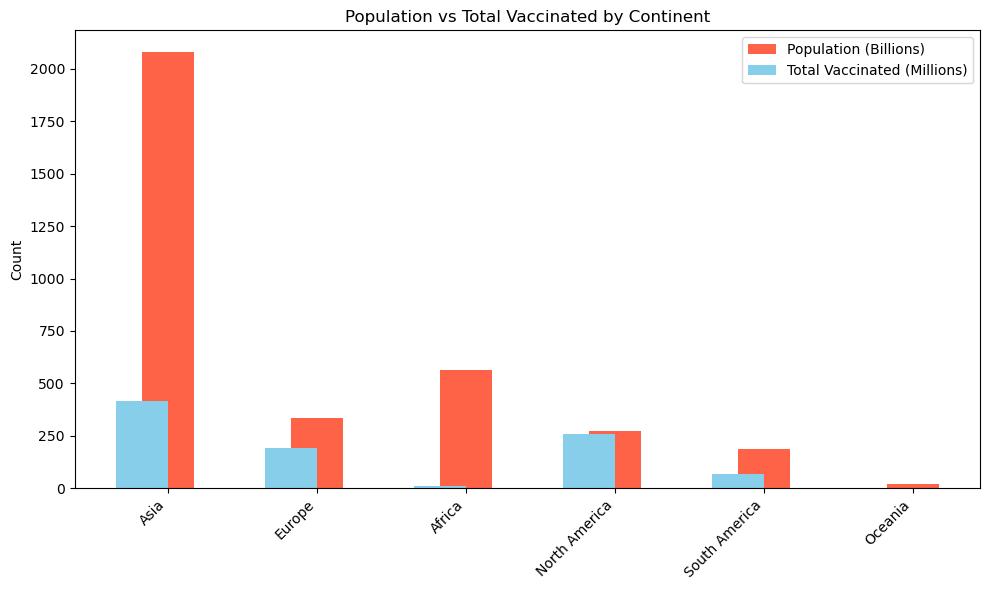

In [36]:
query = ("""select  covid_deaths.continent,  sum(covid_deaths.population) as population,
sum(covid_vaccinations.new_vaccinations)  as total_vaccinated
from covid_deaths
join covid_vaccinations
on covid_deaths.location = covid_vaccinations.location
and covid_deaths.date = covid_vaccinations.date
where covid_deaths.continent is not null
group by covid_deaths.continent""")
cur.execute(query)
data = cur.fetchall()
columns = [desc[0] for desc in cur.description]
df = pd.DataFrame(data, columns = columns)

df['population_billions'] = df['population'] / 1e9      
df['vaccinated_millions'] = df['total_vaccinated'] / 1e6 
x = np.arange(len(df['continent'])) 
width = 0.35
plt.figure(figsize=(10,6))
plt.bar(x, df['population_billions'], width, color='tomato', label='Population (Billions)')
plt.bar(x - width/2, df['vaccinated_millions'], width, color='skyblue', label='Total Vaccinated (Millions)')
plt.xticks(x , df['continent'], rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Population vs Total Vaccinated by Continent')
plt.legend()
plt.tight_layout()
plt.show()

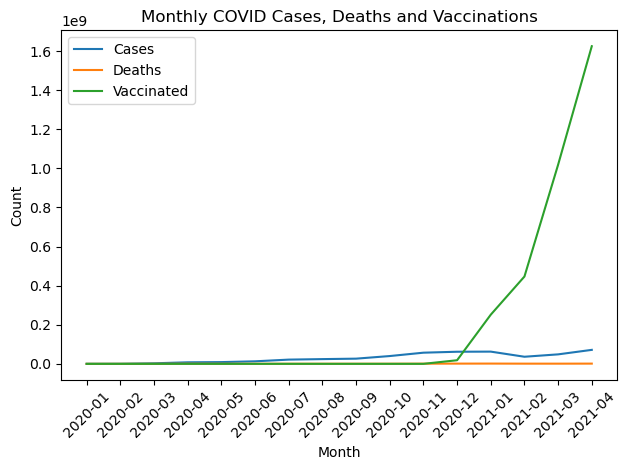

In [52]:
query =("""select covid_deaths.date,
sum(covid_vaccinations.new_vaccinations) as vaccinated, 
sum(covid_deaths.new_cases) as cases,
sum(covid_deaths.new_deaths) as deaths
from covid_deaths
join covid_vaccinations
on covid_deaths.location = covid_vaccinations.location
and covid_deaths.date = covid_vaccinations.date
group by date
order by date""")
cur.execute(query)
data = cur.fetchall()
columns = [desc[0] for desc in cur.description]
df = pd.DataFrame(data, columns = columns)

df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')
monthly = df.groupby('month')[['cases', 'deaths', 'vaccinated']].sum().reset_index()
monthly['month'] = monthly['month'].astype(str)
plt.figure()
plt.plot(monthly['month'], monthly['cases'], label='Cases')
plt.plot(monthly['month'], monthly['deaths'], label='Deaths')
plt.plot(monthly['month'], monthly['vaccinated'], label='Vaccinated')

plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Monthly COVID Cases, Deaths and Vaccinations")
plt.legend()
plt.tight_layout()
plt.show()
